# 02_a. Distributional word representations

* 싸이그래머 / 어바웃 파이썬
* 김무성

# 차례
* TF-IDF
    - gensim으로 tf-idf
    - scikit-learn으로 tf-idf
* Distributional word representations

# TF-IDF
* gensim으로 tf-idf
* scikit-learn으로 tf-idf

#### vector space model

<img src="https://media.licdn.com/mpr/mpr/shrinknp_400_400/AAEAAQAAAAAAAAEDAAAAJGJlMzAwMzU0LTQ5MTEtNDk4Yi04MDVlLWMzN2MwMzZiNzQxMw.png" width=600 />

#### BOW (Bag of Words) 

<img src="https://image.slidesharecdn.com/mrkt451speciallecture1i-140307202701-phpapp01/95/introduction-to-text-mining-8-638.jpg?cb=1394224092" width=600 />

#### TF-IDF

<img src="http://images.slideplayer.com/16/5094063/slides/slide_2.jpg" width=600 />

<img src="http://www.bloter.net/wp-content/uploads/2016/09/td-idf-graphic-765x255.png" width=600 />

<img src="https://i.ytimg.com/vi/zvFGNpbAfEI/hqdefault.jpg" width=600 />

## gensim으로 tf-idf

gensim에서 tf-idf을 계산하려면 문서 목록인 documents를 corpus 클래스로 바꿔야 한다.

In [3]:
# 가상의 4가지 문서 
documents = [
    "a b c a",
    "c b c",
    "b b a",
    "a c c",
    "c b a",
]

In [21]:
from pprint import pprint

# 단어(토큰) 단위로 분할
texts = list(map(lambda x: x.split(), documents))

pprint(texts)

[['a', 'b', 'c', 'a'],
 ['c', 'b', 'c'],
 ['b', 'b', 'a'],
 ['a', 'c', 'c'],
 ['c', 'b', 'a']]


In [23]:
from gensim import corpora

# Dictionary 객체. 구체적으로는 단어에 id 할당 (그 외에도 여러가지 기능은 튜토리얼 참조)
dictionary = corpora.Dictionary(texts)

pprint(dictionary.token2id)

{'a': 0, 'b': 1, 'c': 2}


In [24]:
# 위의 dictioanry를 사용하여 방금 전의 texts를 corpus로 바꾼다.
# 각 문서의 (출현 단어 id, 출현 횟수) 튜플의 리스트 
corpus = list(map(dictionary.doc2bow, texts))
pprint(corpus)

[[(0, 2), (1, 1), (2, 1)],
 [(1, 1), (2, 2)],
 [(0, 1), (1, 2)],
 [(0, 1), (2, 2)],
 [(0, 1), (1, 1), (2, 1)]]


In [33]:
# corpus에서 tfidf 모델 생성
from gensim import models
tfidf_model = models.TfidfModel(corpus)

In [34]:
# 코퍼스들의 tf-idf 구함
corpus_tfidf = tfidf_model[corpus]

for doc in corpus_tfidf:
    print(doc)

[(0, 0.816496580927726), (1, 0.408248290463863), (2, 0.408248290463863)]
[(1, 0.447213595499958), (2, 0.894427190999916)]
[(0, 0.447213595499958), (1, 0.894427190999916)]
[(0, 0.447213595499958), (2, 0.894427190999916)]
[(0, 0.5773502691896257), (1, 0.5773502691896257), (2, 0.5773502691896257)]


In [35]:
# tf-idf기반 유사 문서 찾기
from gensim import similarities
sims = similarities.Similarity('./',corpus_tfidf,
                                      num_features=len(dictionary))
print(sims)
print(type(sims))

Similarity index with 5 documents in 0 shards (stored under ./)
<class 'gensim.similarities.docsim.Similarity'>


In [36]:
# 비교할 문서도 tf-idf로 변경해줘야 한다.
pprint(texts)

query_doc = ['c', 'c', 'c']
print(query_doc)
query_doc_bow = dictionary.doc2bow(query_doc)
print(query_doc_bow)
query_doc_tf_idf = tfidf_model[query_doc_bow]
print(query_doc_tf_idf)

sims[query_doc_tf_idf]

[['a', 'b', 'c', 'a'],
 ['c', 'b', 'c'],
 ['b', 'b', 'a'],
 ['a', 'c', 'c'],
 ['c', 'b', 'a']]
['c', 'c', 'c']
[(2, 3)]
[(2, 1.0)]


array([ 0.40824831,  0.89442718,  0.        ,  0.89442718,  0.57735026], dtype=float32)

### 실습 1 
#### 1) 이걸 tf-idf 벡터화 해보자.
```python
raw_documents = ["I'm taking the show on the road.",
                 "My socks are a force multiplier.",
                 "I am the barber who cuts everyone's hair who doesn't cut their own.",
                 "Legend has it that the mind is a mad monkey.",
                 "I make my own fun."]
```                 
#### 2) 위의 문서 중에서 아래 문서와 가장 유사한 것은 무엇인가?
```python
query_doc = "Socks are a force for good."
```

### 실습 2
#### 1) 다음 문서들을 tf-idf 벡터로 만들어보자.
* https://gasazip.com/view.html?no=614736
* https://gasazip.com/1224697
* https://gasazip.com/view.html?no=599082
* https://gasazip.com/view.html?no=645465
* http://gasazip.com/view.html?no=643505
* https://gasazip.com/view.html?no=615362

#### 2) 위의 문서 중에서 아래 문서와 가장 유사한 것은 무엇인가?
* https://gasazip.com/view.html?no=636135

## scikit-learn으로 tf-idf

Scikit-Learn 의 feature_extraction 서브패키지와 feature_extraction.text 서브 패키지는 다음과 같은 문서 전처리용 클래스를 제공.

* DictVectorizer:
    - 단어의 수를 세어놓은 사전에서 BOW 벡터를 만든다.
* CountVectorizer:
    - 문서 집합으로부터 단어의 수를 세어 BOW 벡터를 만든다.
* TfidfVectorizer:
    - 문서 집합으로부터 단어의 수를 세고 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 벡터를 만든다.
* HashingVectorizer:
    - hashing trick 을 사용하여 빠르게 BOW 벡터를 만든다.

In [40]:
# 코퍼스에서 빈도 벡터 만들기
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',    
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'and': 0,
 'document': 1,
 'first': 2,
 'is': 3,
 'last': 4,
 'one': 5,
 'second': 6,
 'the': 7,
 'third': 8,
 'this': 9}

In [41]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]])

In [42]:
vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [43]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]])

In [44]:
# Stop Words (사전 생성할 때 무시할 단어들) 적용
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'document': 0, 'first': 1, 'last': 2, 'one': 3, 'second': 4, 'third': 5}

In [45]:
vect = CountVectorizer(stop_words="english").fit(corpus)
vect.vocabulary_

{'document': 0, 'second': 1}

In [131]:
# 웹 문서 빈도 분석
import requests
from bs4 import BeautifulSoup
import json
import string
from konlpy.utils import pprint
from konlpy.tag import Hannanum
hannanum = Hannanum()

url = "https://gasazip.com/view.html?no=614736"
#url = "https://gasazip.com/view.html?no=636135"

In [132]:
# HTTP GET Request
req = requests.get(url)
# HTML 소스 가져오기
html = req.text
# BeautifulSoup으로 html소스를 python객체로 변환하기
# 첫 인자는 html소스코드, 두 번째 인자는 어떤 parser를 이용할지 명시.
# 이 글에서는 Python 내장 html.parser를 이용했다.
soup = BeautifulSoup(html, 'html.parser')

In [133]:
lyrics = []
for txt in soup.find_all('div', attrs={'class': 'col-md-8'}) :
    lines = txt.get_text().split('\n')
    for line in lines :
        lyrics.append(line.strip())

In [134]:
lyrics

['CHEER UP',
 '',
 '매일 울리는 벨벨벨',
 '이젠 나를 배려 해줘',
 '배터리 낭비하긴 싫어',
 '자꾸만 봐 자꾸 자꾸만 와',
 '전화가 펑 터질 것만 같아',
 '몰라 몰라 숨도 못 쉰대',
 '나 때문에 힘들어',
 '쿵 심장이 떨어진대 왜',
 '걔 말은 나 너무 예쁘대',
 '자랑 하는건 아니구',
 '아 아까는 못 받아서 미안해',
 '친구를 만나느라 shy shy shy',
 '만나긴 좀 그렇구 미안해',
 '좀 있다 연락할게 later',
 '조르지마 얼마 가지 않아',
 '부르게 해줄게 Baby',
 '아직은 좀 일러 내 맘 같긴 일러',
 '하지만 더 보여줄래',
 'CHEER UP BABY CHEER UP BABY',
 '좀 더 힘을 내',
 '여자가 쉽게 맘을 주면 안돼',
 '그래야 니가 날 더 좋아하게 될걸',
 '태연하게 연기할래 아무렇지 않게',
 '내가 널 좋아하는 맘 모르게',
 'just get it together',
 'and then baby CHEER UP',
 '안절부절 목소리가',
 '여기까지 들려',
 '땀에 젖은 전화기가',
 '여기서도 보여',
 '바로 바로 대답하는 것도',
 '매력 없어',
 '메시지만 읽고',
 '확인 안 하는 건 기본',
 '어어어 너무 심했나 boy',
 '이러다가 지칠까 봐',
 '걱정되긴 하고',
 '어어어 안 그러면 내가 더',
 '빠질 것만 같어 빠질 것만 같어',
 '아 답장을 못해줘서 미안해',
 '친구를 만나느라 shy shy shy',
 '만나긴 좀 그렇구 미안해',
 '좀 있다 연락할게 later',
 '조르지마 어디 가지 않아',
 '되어줄게 너의 Baby',
 '너무 빨린 싫어 성의를 더 보여',
 '내가 널 기다려줄게',
 'CHEER UP BABY CHEER UP BABY',
 '좀 더 힘을 내',
 '여자가 쉽게 맘을 주면 안돼',
 '그래야 니가 날 더 좋아하게 될걸',
 '태연하게 연기할래 아무렇지 않게',
 '내가 널 좋아하는 맘 모르

In [135]:
docs = [w for w in hannanum.nouns(" ".join(lyrics)) if ((not w[0].isnumeric()) and (w[0] not in string.punctuation))]

In [136]:
docs

['벨벨벨',
 '이젠',
 '나',
 '배',
 '배터리',
 '낭비하긴',
 '전화',
 '것',
 '숨',
 '쉰대',
 '나',
 '때문',
 '심장',
 '떨어진대',
 '걔',
 '나',
 '예쁘대',
 '자랑',
 '하는건',
 '아니구',
 '미안',
 '친구',
 '만나긴',
 '그렇구',
 '미안',
 '연락할게',
 '조르지마',
 '얼마',
 '가지',
 '내',
 '같긴',
 '힘',
 '여자',
 '니',
 '될걸',
 '태연',
 '연기할래',
 '나',
 '목소리',
 '여기',
 '전화기',
 '여기',
 '대답',
 '것',
 '매력',
 '확인',
 '거',
 '기본',
 '어어',
 '걱정되긴',
 '어어',
 '나',
 '것',
 '것',
 '답장',
 '미안',
 '친구',
 '만나긴',
 '그렇구',
 '미안',
 '연락할게',
 '조르지마',
 '가지',
 '너',
 '성의',
 '나',
 '힘',
 '여자',
 '니',
 '될걸',
 '태연',
 '연기할래',
 '나',
 '나',
 '니',
 '상처',
 '걱정',
 '여자',
 '이해해주길',
 '속',
 '마음',
 '겁',
 '지금',
 '조금',
 '걸리진',
 '힘',
 '여자',
 '니',
 '될걸',
 '태연',
 '연기할래',
 '나']

여기에서는 하나의 문서가 하나의 단어로만 이루어져 있다. 따라서 CountVectorizer로 이 문서 집합을 처리하면 각 문서는 하나의 원소만 1이고 나머지 원소는 0인 벡터가 된다. 이 벡터의 합으로 빈도를 알아보았다.


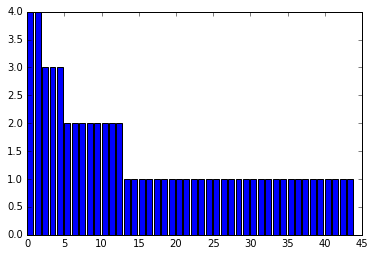

In [137]:
import numpy as np
import matplotlib.pyplot as plt

vect = CountVectorizer().fit(docs)
count = vect.transform(docs).toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]
feature_name = np.array(vect.get_feature_names())[idx]
plt.bar(range(len(count)), count)
plt.show()

In [138]:
pprint(list(zip(feature_name, count)))

[('여자', 4),
 ('미안', 4),
 ('태연', 3),
 ('연기할래', 3),
 ('될걸', 3),
 ('가지', 2),
 ('친구', 2),
 ('조르지마', 2),
 ('그렇구', 2),
 ('여기', 2),
 ('어어', 2),
 ('연락할게', 2),
 ('만나긴', 2),
 ('얼마', 1),
 ('이해해주길', 1),
 ('이젠', 1),
 ('자랑', 1),
 ('전화', 1),
 ('전화기', 1),
 ('조금', 1),
 ('지금', 1),
 ('예쁘대', 1),
 ('아니구', 1),
 ('성의', 1),
 ('쉰대', 1),
 ('같긴', 1),
 ('걱정', 1),
 ('걱정되긴', 1),
 ('걸리진', 1),
 ('기본', 1),
 ('낭비하긴', 1),
 ('답장', 1),
 ('대답', 1),
 ('때문', 1),
 ('떨어진대', 1),
 ('마음', 1),
 ('매력', 1),
 ('목소리', 1),
 ('배터리', 1),
 ('벨벨벨', 1),
 ('상처', 1),
 ('하는건', 1),
 ('심장', 1),
 ('확인', 1)]


In [46]:
# 코퍼스에서 tf-idf 벡터 만들기
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',    
]

In [49]:
tfidv = TfidfVectorizer().fit(corpus)
corpus_tfidf = tfidv.transform(corpus).toarray()
corpus_tfidf

array([[ 0.        ,  0.38947624,  0.55775063,  0.4629834 ,  0.        ,
         0.        ,  0.        ,  0.32941651,  0.        ,  0.4629834 ],
       [ 0.        ,  0.24151532,  0.        ,  0.28709733,  0.        ,
         0.        ,  0.85737594,  0.20427211,  0.        ,  0.28709733],
       [ 0.55666851,  0.        ,  0.        ,  0.        ,  0.        ,
         0.55666851,  0.        ,  0.26525553,  0.55666851,  0.        ],
       [ 0.        ,  0.38947624,  0.55775063,  0.4629834 ,  0.        ,
         0.        ,  0.        ,  0.32941651,  0.        ,  0.4629834 ],
       [ 0.        ,  0.45333103,  0.        ,  0.        ,  0.80465933,
         0.        ,  0.        ,  0.38342448,  0.        ,  0.        ]])

In [53]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(corpus_tfidf)

array([[ 1.        ,  0.42719768,  0.08737955,  1.        ,  0.30286802],
       [ 0.42719768,  1.        ,  0.05418431,  0.42719768,  0.18780932],
       [ 0.08737955,  0.05418431,  1.        ,  0.08737955,  0.10170546],
       [ 1.        ,  0.42719768,  0.08737955,  1.        ,  0.30286802],
       [ 0.30286802,  0.18780932,  0.10170546,  0.30286802,  1.        ]])

### 실습 3 - 실습 2를 scikit-learn으로 해보자
#### 1) 다음 문서들을 tf-idf 벡터로 만들어보자.
* https://gasazip.com/view.html?no=614736
* https://gasazip.com/1224697
* https://gasazip.com/view.html?no=599082
* https://gasazip.com/view.html?no=645465
* http://gasazip.com/view.html?no=643505
* https://gasazip.com/view.html?no=615362

#### 2) 위의 문서 중에서 아래 문서와 가장 유사한 것은 무엇인가?
* https://gasazip.com/view.html?no=636135

# Distributional word representations
* 환경 설정
* Distributional matrices
* Vector comparison
* Distributional neighbors
* Matrix reweighting

#### 참고
* [7] CS224U: Natural Language Understanding - https://web.stanford.edu/class/cs224u/
* [8] CS224U: Natural Language Understanding / Distributional word representations 
    - notebook -  http://nbviewer.jupyter.org/github/cgpotts/cs224u/blob/master/vsm.ipynb
    - Overview slide - https://web.stanford.edu/class/cs224u/materials/cs224u-vsm-overview.pdf
    - Vector comparison slide - https://web.stanford.edu/class/cs224u/materials/cs224u-vsm-veccompare.pdf
    - Reweighting slide - https://web.stanford.edu/class/cs224u/materials/cs224u-vsm-weighting.pdf

## 환경 설정
* data - https://web.stanford.edu/class/cs224u/data/vsmdata.zip

In [144]:
!wget https://web.stanford.edu/class/cs224u/data/vsmdata.zip

--2018-01-12 22:02:56--  https://web.stanford.edu/class/cs224u/data/vsmdata.zip
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12703912 (12M) [application/zip]
Saving to: ‘vsmdata.zip’

vsmdata.zip         100%[=====================>]  12.12M   446KB/s   in 28s    

2018-01-12 22:03:25 (441 KB/s) - ‘vsmdata.zip’ saved [12703912/12703912]



In [145]:
!unzip vsmdata.zip

Archive:  vsmdata.zip
   creating: vsmdata/
  inflating: vsmdata/.DS_Store       
   creating: __MACOSX/
   creating: __MACOSX/vsmdata/
  inflating: __MACOSX/vsmdata/._.DS_Store  
  inflating: vsmdata/gigawordnyt-advmod-matrix.csv  
  inflating: __MACOSX/vsmdata/._gigawordnyt-advmod-matrix.csv  
  inflating: vsmdata/imdb-posneg-lexicon.pickle  
  inflating: __MACOSX/vsmdata/._imdb-posneg-lexicon.pickle  
  inflating: vsmdata/imdb-worddoc.csv  
  inflating: __MACOSX/vsmdata/._imdb-worddoc.csv  
  inflating: vsmdata/imdb-wordword.csv  
  inflating: __MACOSX/vsmdata/._imdb-wordword.csv  
  inflating: vsmdata/longer_shuffled_synset_relations.tsv  
  inflating: __MACOSX/vsmdata/._longer_shuffled_synset_relations.tsv  
   creating: vsmdata/question-data/
  inflating: vsmdata/question-data/capital-common-countries.txt  
   creating: __MACOSX/vsmdata/question-data/
  inflating: __MACOSX/vsmdata/question-data/._capital-common-countries.txt  
  inflating: vsmdata/question-data/capital-world.txt 

In [147]:
!ls vsmdata*

vsmdata.zip

vsmdata:
gigawordnyt-advmod-matrix.csv  imdb-wordword.csv		     README.txt
imdb-posneg-lexicon.pickle     longer_shuffled_synset_relations.tsv  wordsim
imdb-worddoc.csv	       question-data


In [150]:
vsmdata_home = "vsmdata"

In [152]:
import os
import sys
import csv
import random
import itertools
from operator import itemgetter
from collections import defaultdict
import numpy as np
import scipy
import scipy.spatial.distance
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import utils

## Distributional matrices
* Overview slide - https://web.stanford.edu/class/cs224u/materials/cs224u-vsm-overview.pdf

The data distribution includes two pre-computed matrices of co-occurrence counts in IMDB movie reviews. The build function in the utils module for this repository allows you to read them in:

Let's read these in now for use in later examples:

In [153]:
ww = utils.build(os.path.join(vsmdata_home, 'imdb-wordword.csv'))
wd = utils.build(os.path.join(vsmdata_home, 'imdb-worddoc.csv'))

In [168]:
print(len(ww))

3


In [170]:
print(len(ww[0]), ww[0][:2])

2998 [[  3.43744000e+05   2.25000000e+02   4.41000000e+02 ...,   4.74000000e+02
    1.62500000e+03   1.05000000e+03]
 [  1.43000000e+02   2.18000000e+02   9.00000000e+00 ...,   3.00000000e+00
    3.00000000e+00   5.00000000e+00]]


In [173]:
print(len(ww[1]), ww[1][:10])

2998 ['!', '):', ');', '1', '1/10', '1/2', '10', '10/10', '100', '11']


In [174]:
print(len(ww[2]), ww[2][:10])

2998 ['!', '):', ');', '1', '1/10', '1/2', '10', '10/10', '100', '11']


## Vector comparison
* Vector comparison slide - https://web.stanford.edu/class/cs224u/materials/cs224u-vsm-veccompare.pdf

#### Euclidean distance

<img src="https://render.githubusercontent.com/render/math?math=%5Csqrt%7B%5Csum_%7Bi%3D1%7D%5E%7Bn%7D%20%7Cu_%7Bi%7D-v_%7Bi%7D%7C%5E2%7D&mode=display"/>

In [175]:
def euclidean(u, v):    
    """Eculidean distance between 1d np.arrays `u` and `v`, which must 
    have the same dimensionality. Returns a float."""
    # Use scipy's method:
    return scipy.spatial.distance.euclidean(u, v)
    # Or define it yourself:
    # return vector_length(u - v)

#### vector length

<img src="https://render.githubusercontent.com/render/math?math=%5C%7Cu%5C%7C%20%3D%20%5Csqrt%7B%5Csum_%7Bi%3D1%7D%5E%7Bn%7D%20u_%7Bi%7D%5E%7B2%7D%7D&mode=display" />

In [176]:
def vector_length(u):
    """Length (L2) of the 1d np.array `u`. Returns a new np.array with the 
    same dimensions as `u`."""
    return np.sqrt(np.dot(u, u))

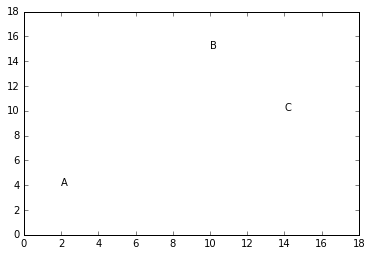

In [177]:
ABC = np.array([
    [ 2.0,  4.0],  # A
    [10.0, 15.0],  # B
    [14.0, 10.0]]) # C

def plot_ABC(m):
    plt.plot(m[:,0], m[:,1], marker='', linestyle='')
    plt.xlim([0,np.max(m)*1.2])
    plt.ylim([0,np.max(m)*1.2])
    for i, x in enumerate(['A','B','C']):
        plt.annotate(x, m[i,:])

plot_ABC(ABC)

In [178]:
euclidean(ABC[0], ABC[1])

13.601470508735444

In [179]:
euclidean(ABC[1], ABC[2])

6.4031242374328485

#### Length normalization 

In [180]:
def length_norm(u):
    """L2 norm of the 1d np.array `u`. Returns a float."""
    return u / vector_length(u)

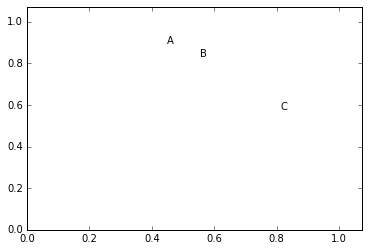

In [181]:
plot_ABC(np.array([length_norm(row) for row in ABC]))

#### Cosine distance

<img src="https://render.githubusercontent.com/render/math?math=1%20-%20%5Cleft%28%5Cfrac%7B%5Csum_%7Bi%3D1%7D%5E%7Bn%7D%20u_%7Bi%7D%20%5Ccdot%20v_%7Bi%7D%7D%7B%5C%7Cu%5C%7C%5Ccdot%20%5C%7Cv%5C%7C%7D%5Cright%29&mode=display" />

In [182]:
def cosine(u, v):        
    """Cosine distance between 1d np.arrays `u` and `v`, which must have 
    the same dimensionality. Returns a float."""
    # Use scipy's method:
    return scipy.spatial.distance.cosine(u, v)
    # Or define it yourself:
    # return 1.0 - (np.dot(u, v) / (vector_length(u) * vector_length(v)))

In [183]:
for m in (euclidean, cosine):
    fmt = {'n': m.__name__,  
           'AB': m(ABC[0], ABC[1]), 
           'BC': m(ABC[1], ABC[2])}
    print('%(n)15s(A, B) = %(AB)5.2f %(n)15s(B, C) = %(BC)5.2f' % fmt)

      euclidean(A, B) = 13.60       euclidean(B, C) =  6.40
         cosine(A, B) =  0.01          cosine(B, C) =  0.07


## Distributional neighbors

In [184]:
def neighbors(word, mat, rownames, distfunc=cosine):    
    """Tool for finding the nearest neighbors of `word` in `mat` according 
    to `distfunc`. The comparisons are between row vectors.
    
    Parameters
    ----------
    word : str
        The anchor word. Assumed to be in `rownames`.
        
    mat : np.array
        The vector-space model.
        
    rownames : list of str
        The rownames of mat.
            
    distfunc : function mapping vector pairs to floats (default: `cosine`)
        The measure of distance between vectors. Can also be `euclidean`, 
        `matching`, `jaccard`, as well as any other distance measure  
        between 1d vectors.
        
    Raises
    ------
    ValueError
        If word is not in rownames.
    
    Returns
    -------    
    list of tuples
        The list is ordered by closeness to `word`. Each member is a pair 
        (word, distance) where word is a str and distance is a float.
    
    """
    if word not in rownames:
        raise ValueError('%s is not in this VSM' % word)
    w = mat[rownames.index(word)]
    dists = [(rownames[i], distfunc(w, mat[i])) for i in range(len(mat))]
    return sorted(dists, key=itemgetter(1), reverse=False)

In [185]:
neighbors(word='superb', mat=ww[0], rownames=ww[1], distfunc=cosine)[: 5]

[('superb', 0.0),
 ('excellent', 0.0026965023912962627),
 ('outstanding', 0.0027344413235225185),
 ('beautifully', 0.0027345163104325332),
 ('brilliant', 0.0027888643627085319)]

In [186]:
neighbors(word='superb', mat=ww[0], rownames=ww[1], distfunc=euclidean)[: 5]

[('superb', 0.0),
 ('familiar', 1448.8919904533948),
 ('violent', 1630.3723501090174),
 ('follows', 1647.0276257549538),
 ('convincing', 1701.2260284865147)]

## Matrix reweighting
* Reweighting slide - https://web.stanford.edu/class/cs224u/materials/cs224u-vsm-weighting.pdf

#### Normalization

In [187]:
def prob_norm(u):
    """Normalize 1d np.array `u` into a probability distribution. Assumes 
    that all the members of `u` are positive. Returns a 1d np.array of 
    the same dimensionality as `u`."""
    return u / np.sum(u)

#### TF-IDF

In [188]:
def tfidf(mat, rownames=None):
    """TF-IDF 
    
    Parameters
    ----------
    mat : 2d np.array
       The matrix to operate on.
       
    rownames : list of str or None
        Not used; it's an argument only for consistency with other methods 
        defined here.
        
    Returns
    -------
    (np.array, list of str)    
       The first member is the TF-IDF-transformed version of `mat`, and 
       the second member is `rownames` (unchanged).
    
    """
    colsums = np.sum(mat, axis=0)
    doccount = mat.shape[1]
    w = np.array([_tfidf_row_func(row, colsums, doccount) for row in mat])
    return (w, rownames)

def _tfidf_row_func(row, colsums, doccount):
    df = float(len([x for x in row if x > 0]))
    idf = 0.0
    # This ensures a defined IDF value >= 0.0:
    if df > 0.0 and df != doccount:
        idf = np.log(doccount / df)
    tfs = row/colsums
    return tfs * idf

In [189]:
wd_tfidf = tfidf(mat=wd[0], rownames=wd[1])

In [190]:
neighbors(word='superb', mat=wd_tfidf[0], rownames=wd_tfidf[1], distfunc=cosine)[: 5]

[('superb', 0.0),
 ('outstanding', 0.72256301656130351),
 ('remain', 0.73606093603489875),
 ('viewed', 0.74639986506462097),
 ('and', 0.74880553661599947)]

# 참고자료
* [1] gensim の tfidf で正規化（normalize）に苦しんだ話 - http://tawara.hatenablog.com/entry/2016/11/08/021408
* [2] How do I compare document similarity using Python? - https://www.oreilly.com/learning/how-do-i-compare-document-similarity-using-python
* [3] Scikit-Learn의 문서 전처리 기능 - https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/
* [4] 나만의 웹 크롤러 만들기 with Requests/BeautifulSoup - https://beomi.github.io/2017/01/20/HowToMakeWebCrawler/
* [5] scikit-learn: TF/IDF and cosine similarity for computer science papers - http://www.markhneedham.com/blog/2016/07/27/scitkit-learn-tfidf-and-cosine-similarity-for-computer-science-papers/
* [6] sklearn.metrics.pairwise.cosine_similarity - http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html#sklearn.metrics.pairwise.cosine_similarity
* [7] CS224U: Natural Language Understanding - https://web.stanford.edu/class/cs224u/
* [8] CS224U: Natural Language Understanding / Distributional word representations 
    - notebook -  http://nbviewer.jupyter.org/github/cgpotts/cs224u/blob/master/vsm.ipynb
    - Overview slide - https://web.stanford.edu/class/cs224u/materials/cs224u-vsm-overview.pdf
    - Vector comparison slide - https://web.stanford.edu/class/cs224u/materials/cs224u-vsm-veccompare.pdf
    - Reweighting slide - https://web.stanford.edu/class/cs224u/materials/cs224u-vsm-weighting.pdf